# Тестовое задание в команду продуктовой аналитики, Gett.

В папке с заданием два датасета - data_orders - содержит выборку данных по заказам пользователей и включает такие колонки как:
* order_datetime -  время заказа
* origin_longitude - долгота
* origin_latitude - широта
* m_order_eta - время до прибытия машины
* order_gk - номер заказа
* order_status_key - статус (4 - отменен клиентом, 9 - отменен системой (reject))
* is_driver_assigned_key - был ли назначен водитель
* cancellations_time_in_seconds - сколько секунд прошло до отмены

data_offers - содержит пары номер заказа - ID оффера, который был предложен водителю по данному заказу.


В момент когда клиент нажимать на кнопку "Заказать" в приложении, система матчинга подыскивает наиболее релевантых водителей и предлагаем им заказ. В задании предлагается исследовать некоторые метрики матчинга для заказов, которые не завершились успешно (клиент в итоге не получил машину). 

### 0. Подготовка данных 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

In [2]:
data_orders = pd.read_csv("data/data_orders.csv")

In [3]:
data_orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


Проверим начилие пропусков

In [134]:
data_orders.isnull().sum()

order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta                      7902
order_gk                            0
order_status_key                    0
is_driver_assigned_key              0
cancellations_time_in_seconds    3409
dtype: int64

Посмотрим как распределены наши переменные

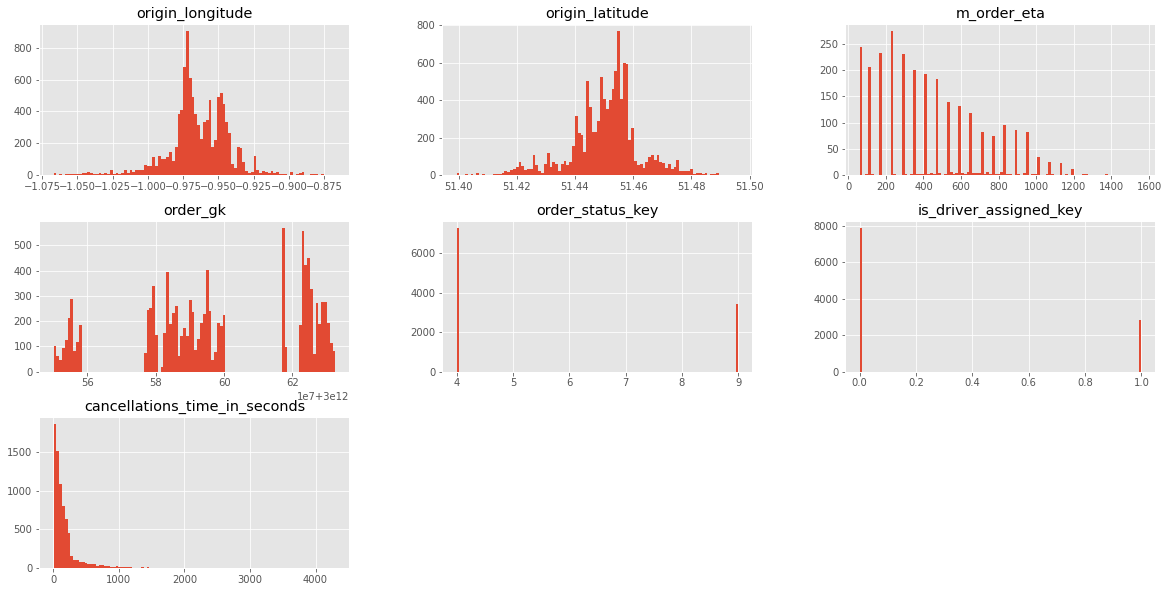

In [4]:
data_orders.hist(bins=100, figsize=(20,10));

### 1. Постройте распределение заказов по причинам неуспеха: отмены до и после назначения водителя, режекты

In [5]:
gr_data = data_orders.groupby(['is_driver_assigned_key','order_status_key'])['order_gk'].agg(['count'])

In [6]:
gr_data

count
is_driver_assigned_key order_status_key       
0                      4                  4496
                       9                  3406
1                      4                  2811
                       9                     3

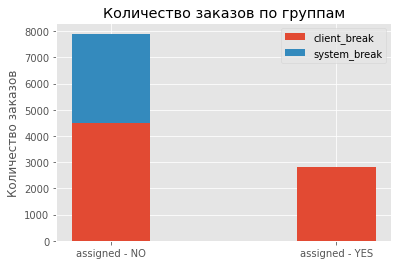

In [7]:
labels = ['assigned - NO', 'assigned - YES']
client_break = [gr_data.iloc[0][0],gr_data.iloc[2][0]]
system_break = [gr_data.iloc[1][0],gr_data.iloc[3][0]]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, client_break, width, label='client_break')
ax.bar(labels, system_break, width, label='system_break', bottom=client_break)

ax.set_ylabel('Количество заказов')
ax.set_title('Количество заказов по группам')
ax.legend()

plt.show()

Проанализируйте полученный график - в какой категории наибольшое количество заказов?

> <div class="alert alert-block alert-info">
<b>Вывод :</b> <br>
    Наибольшее количество отклоненных заказов среди тех, по которым не был назначен водитель и отмененный клиентов. Среди заказов по которому был найден водитель, практически все отменены клиентом. </div>

### 2. Постройте график распределения фейлов по часам - наблюдается ли тендеция, что в какие то часы доля той или иной категории аномально высока?

In [8]:
data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'])

In [9]:
data_orders['hours'] = data_orders['order_datetime'].apply(lambda x: x.hour)

In [10]:
data_orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,hours
0,2022-03-22 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,2022-03-22 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,2022-03-22 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,2022-03-22 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,2022-03-22 21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21
...,...,...,...,...,...,...,...,...,...
10711,2022-03-22 13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,13
10712,2022-03-22 13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,13
10713,2022-03-22 13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,13
10714,2022-03-22 13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,13


Построим график зависимости количества отказов в зависимости от часа

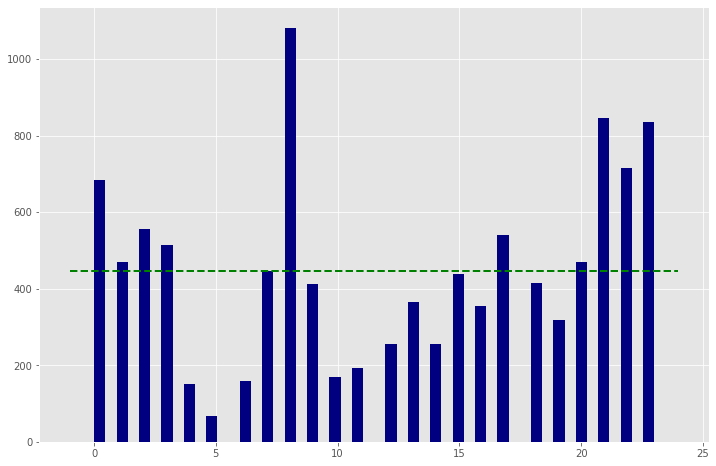

In [12]:
plt.figure(figsize=(12,8))
plt.hist(data_orders.hours, bins=50, color = 'navy');
plt.hlines(data_orders.hours.value_counts().mean(), -1, 24, color='green',linestyle="--", lw = 2)

Построим аналогичный график, только по подтвержденным заказам:

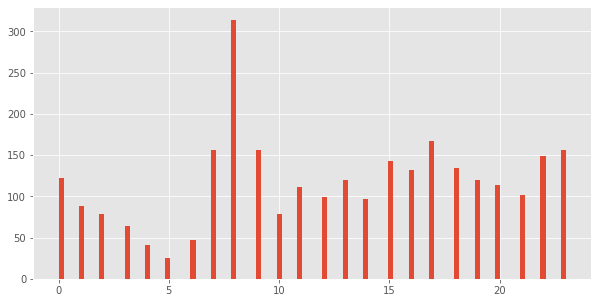

In [147]:
data_orders[data_orders.is_driver_assigned_key == 1].hours.hist(bins=100,figsize =(10,5));

По неподтвержденным заказам:

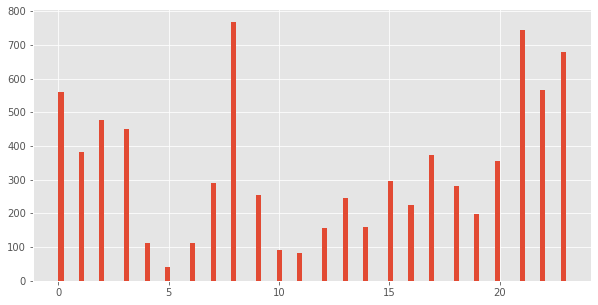

In [148]:
data_orders[data_orders.is_driver_assigned_key == 0].hours.hist(bins=100,figsize =(10,5));

По неподтвержденным заказам по которым отмена была со стороны клиента:

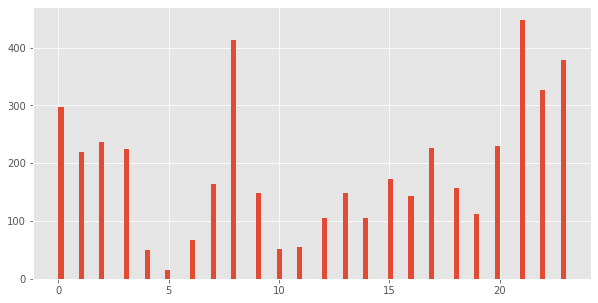

In [14]:
data_orders[(data_orders.is_driver_assigned_key == 0) & (data_orders.order_status_key == 4)].hours.hist(bins=100,figsize =(10,5));

По неподтвержденным заказам по которым отмена была со стороны водителя:

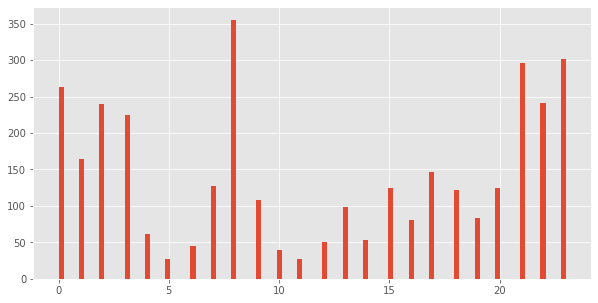

In [150]:
data_orders[(data_orders.is_driver_assigned_key == 0) & (data_orders.order_status_key == 9)].hours.hist(bins=100,figsize =(10,5));

В какие часы фейлов больше всего? Чем это можно объяснить?

> <div class="alert alert-block alert-info">
<b>Вывод :</b> <br>
    Наибольшее количество отказов наблюдается в 8 утра - 1000, среди них подтверденных 300 (почти все отменены клиентом), неподтвержденных - 800 (половина отменена клиентом, половина системой). После 8 утра колиество отказов падает до средних значений и далее возрастает к максимум в 21-22 вечера. Рост количества отказов вечером находится среди неподтвержденных заказов.
Резкий рост в 8 утра вероятно обсуловлен массовым выездом на работу. Рост количества отмен вечером, именно среди неподтвержденных закзов, вероятно обусловлен большей вариативностью клиентов (так как утром нужно обязательно приехать на работу).  </div>

### 3. Постройте графики среднего времени до отмены (cancellations_time_in_seconds) с водителем и без, по часам. Если есть выбросы в данных - лучше удалить. Можно ли сделать выводы по этому графику?

Посмторим для начала на графики среднего времени до отмены без поправки на выбросы

<AxesSubplot:xlabel='hours', ylabel='cancellations_time_in_seconds'>

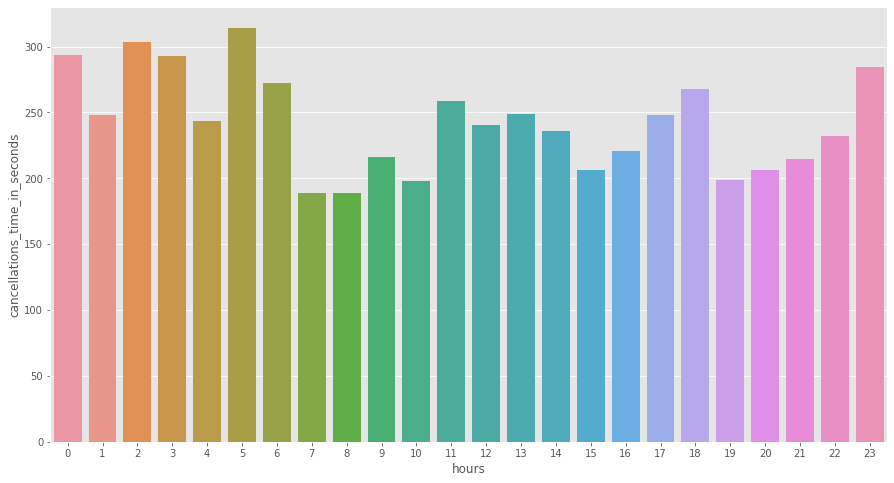

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x='hours', y='cancellations_time_in_seconds', data=data_orders[data_orders.is_driver_assigned_key == 1], ci=None)

<AxesSubplot:xlabel='hours', ylabel='cancellations_time_in_seconds'>

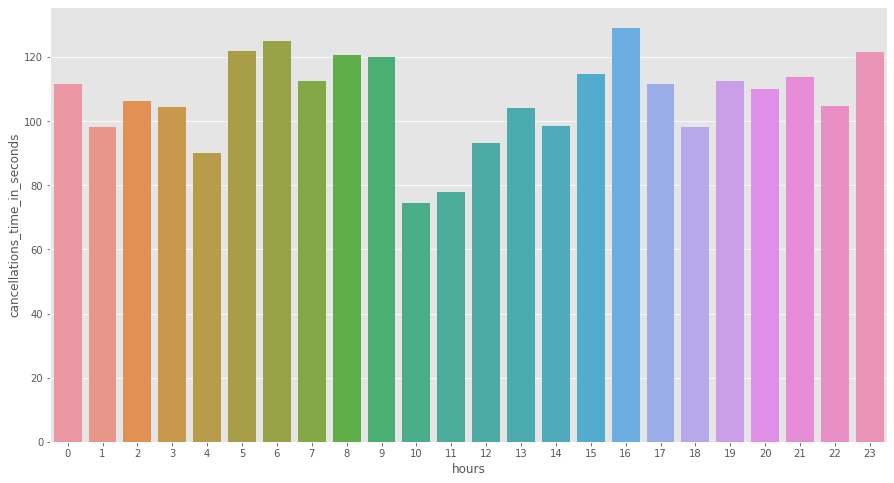

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x='hours', y='cancellations_time_in_seconds', data=data_orders[data_orders.is_driver_assigned_key == 0], ci=None)

Видим, что по заказам, где водитель был уже подтвержден время до отмены больше почти в 2 раза  
Теперь посмотрим на данные без аномалий

Поищем выбросы в данных, посмтроим частотное распределение времени до отмены заказа

<AxesSubplot:>

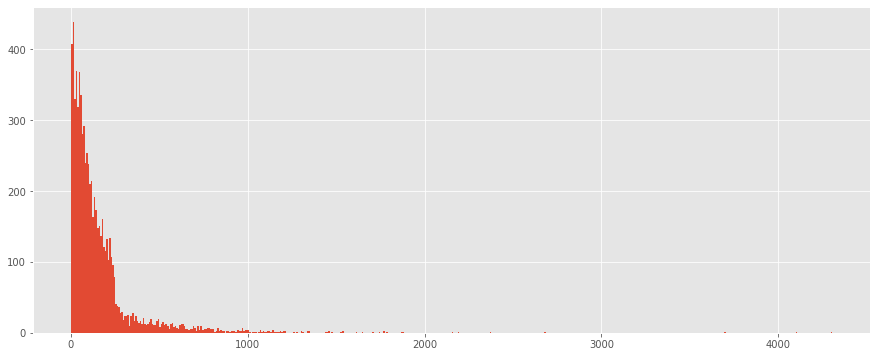

In [34]:
data_orders.cancellations_time_in_seconds.hist(bins=500, figsize=(15,6))

(0.0, 4000.0)

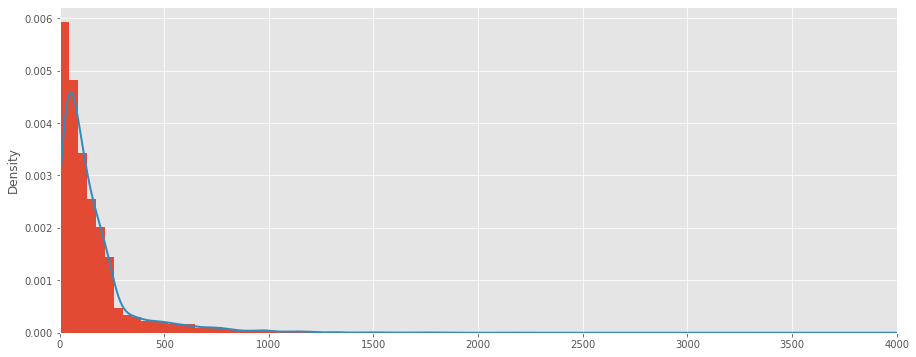

In [35]:
data_orders.cancellations_time_in_seconds.hist(bins=100, density=True, figsize=(15,6))
data_orders.cancellations_time_in_seconds.plot(kind='kde', linewidth=2)
plt.xlim(0, 4000)

Построим тоже распределение в логорифмическом масштабе, чтобы лучше было видно выбросы

<AxesSubplot:>

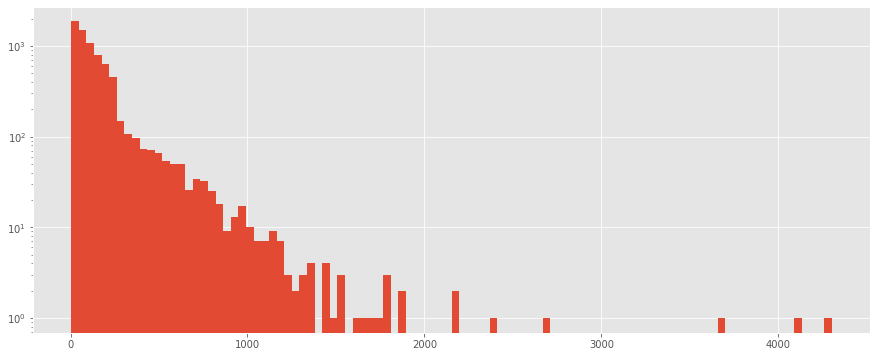

In [36]:
data_orders.cancellations_time_in_seconds.hist(bins=100, log=True, figsize=(15,6))

Посмотрим на границы аномалий, посчитанные по правилу 3х стандартных отклонений:

In [37]:
up_bound = data_orders.cancellations_time_in_seconds.mean()+3*data_orders.cancellations_time_in_seconds.std()
low_bound = data_orders.cancellations_time_in_seconds.mean()-3*data_orders.cancellations_time_in_seconds.std()
print('Верхняя граница:', up_bound)
print('Нижняя граница:', low_bound)

Верхняя граница: 797.9929108022121
Нижняя граница: -482.20886810343006


Теперь будем считать аномалиями, все что выходит за Q1-1.5*IQR и Q3+1.5*IQR

In [38]:
IQR = data_orders.cancellations_time_in_seconds.quantile(0.75)-data_orders.cancellations_time_in_seconds.quantile(0.25)
up_bound_iqr = data_orders.cancellations_time_in_seconds.quantile(0.75)+1.5*IQR
low_bound_iqr = data_orders.cancellations_time_in_seconds.quantile(0.25)-1.5*IQR
print('IQR:', IQR)
print('Верхняя граница:', up_bound_iqr)
print('Нижняя граница:', low_bound_iqr)

IQR: 142.5
Верхняя граница: 401.25
Нижняя граница: -168.75


Для наших данных будем использовать второй способ, привязанный к IQR

In [39]:
data_orders_anomalies_free = data_orders[(data_orders.cancellations_time_in_seconds<up_bound_iqr) &
                                        (data_orders.cancellations_time_in_seconds>low_bound_iqr)]

<AxesSubplot:>

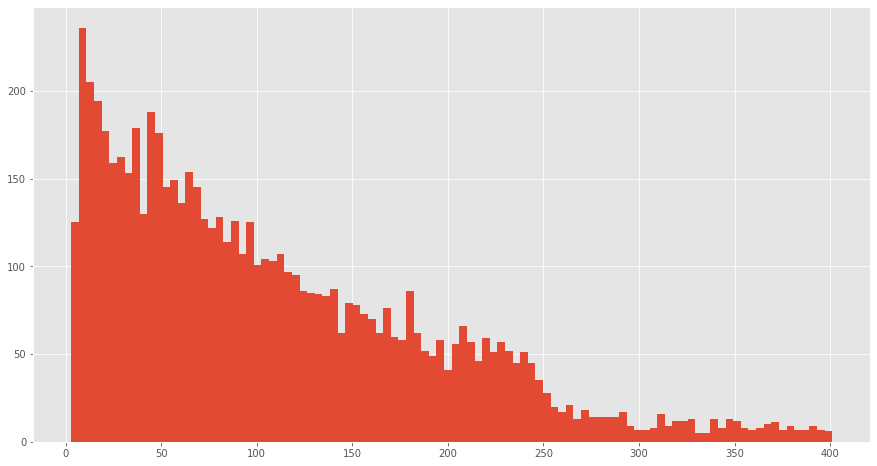

In [40]:
data_orders_anomalies_free.cancellations_time_in_seconds.hist(bins=100, figsize=(15,8))

Строим графики без аномалий:

<AxesSubplot:xlabel='hours', ylabel='cancellations_time_in_seconds'>

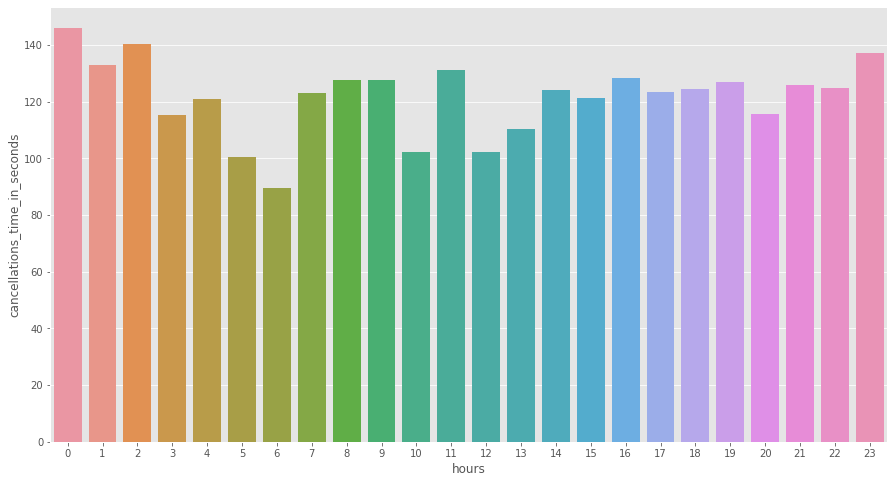

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(x='hours', y='cancellations_time_in_seconds', data=data_orders_anomalies_free[data_orders_anomalies_free.is_driver_assigned_key == 1], ci=None)

<AxesSubplot:xlabel='hours', ylabel='cancellations_time_in_seconds'>

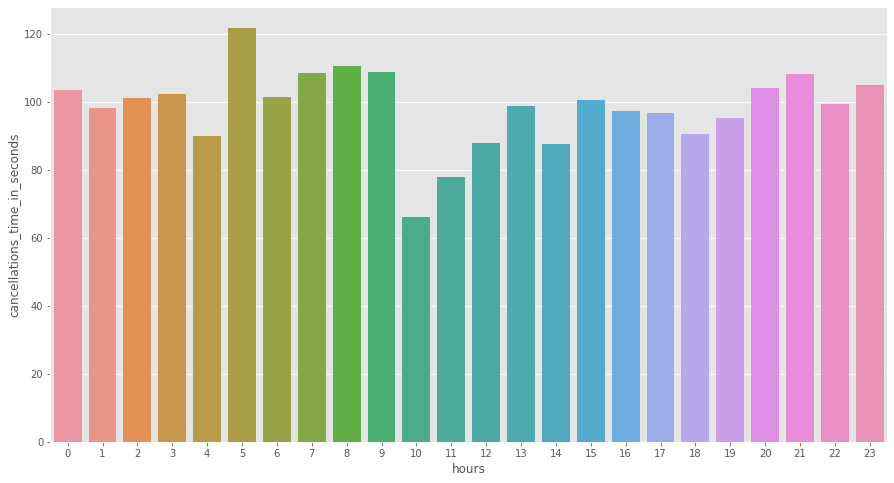

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x='hours', y='cancellations_time_in_seconds', data=data_orders_anomalies_free[data_orders_anomalies_free.is_driver_assigned_key == 0], ci=None)

Видим, что теперь разница времени до отказа между заказами с назначенным водителем и без него - отсутствует.

> <div class="alert alert-block alert-info">
<b>Вывод :</b> <br>
    Какой-либо зависимости в данных не обнаружено  </div>


### 4. Постройте распределение среднего ЕТА по часам. Чем можно объяснить такой вид графика?

ETA - время до прибытия авто

Для начала построим частотное распределение времени до прибытия авто по имеющей выбрке

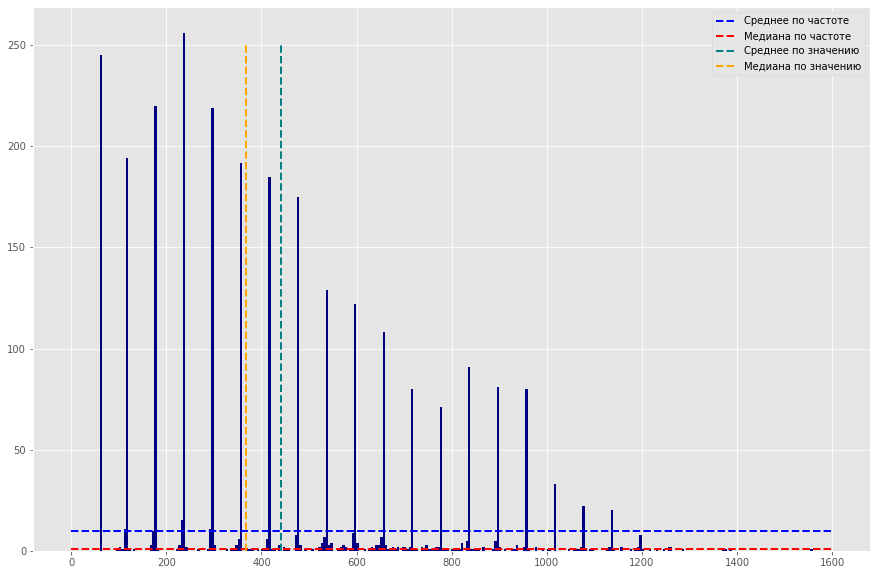

In [67]:
plt.figure(figsize=(15,10))
plt.hist(data_orders.m_order_eta, bins=300, color = 'navy');
plt.hlines(data_orders.m_order_eta.value_counts().mean(), 0, 1600, color='blue',linestyle="--", lw = 2, label = 'Среднее по частоте')
plt.hlines(data_orders.m_order_eta.value_counts().median(), 0, 1600, color='red',linestyle="--", lw = 2, label = 'Медиана по частоте')
plt.vlines(data_orders.m_order_eta.mean(), 0, 250, color='teal',linestyle="--", lw = 2, label = 'Среднее по значению')
plt.vlines(data_orders.m_order_eta.median(), 0, 250, color='orange',linestyle="--", lw = 2, label = 'Медиана по значению')
plt.legend(loc = 'best')

Заметим, что значительная часть данных "время до прибытия авто" попадает в узкие коридоры, вероятно это связано с округлением времени до прибытия авто

<AxesSubplot:xlabel='hours', ylabel='m_order_eta'>

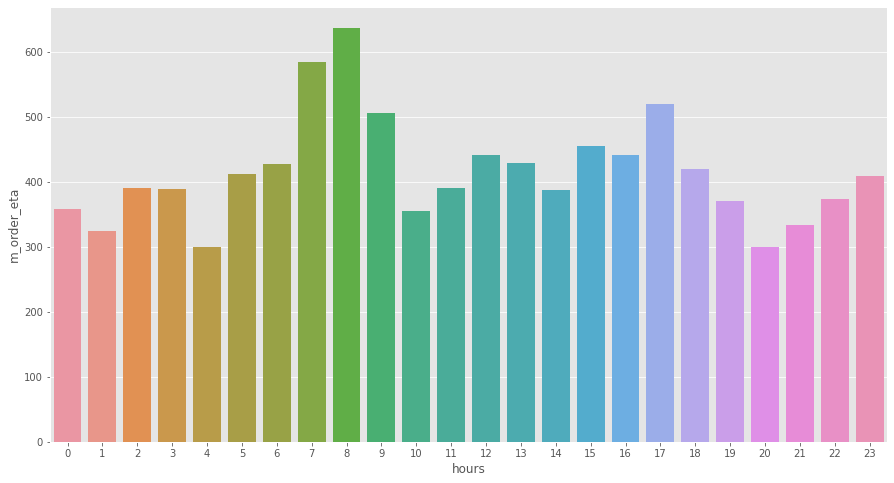

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(x='hours', y='m_order_eta', data=data_orders, ci=None)

> <div class="alert alert-block alert-info">
<b>Вывод :</b> <br>
    Значительная часть данных "время до прибытия авто" попадает в узкие коридоры, вероятно это связано с округлением времени до прибытия авто. Время до прибытия авто максимально в утренние часы, когда начинается рабочий день. </div>

### 6*. Гексаконы.
Воспользовавшись пакетами h3 и folium, посчитайте, сколько гексагонов размера 8 (https://uber.github.io/h3/#/documentation/core-library/resolution-table) содержат 80% всех заказов из исходного датасета и визуализируйте гексагон с наибольшим количеством фейлов на карте.

In [70]:
import h3
import folium
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon

Добавим новый столбец, который будет хранить адреса гексагонов по координатам в датасете

In [71]:
data_orders['h3_addresses'] = 0
for index in range(0,len(data_orders.origin_latitude)):
    data_orders.h3_addresses[index] = h3.geo_to_h3(data_orders.origin_latitude[index], data_orders.origin_longitude[index], 8)

<ipython-input-71-b6cfdd7f715c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders.h3_addresses[index] = h3.geo_to_h3(data_orders.origin_latitude[index], data_orders.origin_longitude[index], 8)


Теперь сгруппируем данные по адресам гексагонов с указанием их количества в датасете

In [72]:
data_gezagons = data_orders.groupby(['h3_addresses'], as_index = False).agg({'origin_longitude':'count'}).rename(columns = {'origin_longitude':'counts'})
data_gezagons 

,h3_addresses,counts
0,88195d2801fffff,26
1,88195d2803fffff,11
2,88195d2805fffff,8
3,88195d2807fffff,1
4,88195d2809fffff,16
...,...,...
139,88195d749dfffff,2
140,88195d74d1fffff,3
141,88195d74d3fffff,2
142,88195d74d5fffff,1


Для каждого гексагона получим координаты его построения

In [74]:
data_gezagons['coordinate_poligons'] = 0
for index in range(0,len(data_gezagons['h3_addresses'])):
    data_gezagons['coordinate_poligons'][index] = h3.h3_set_to_multi_polygon([data_gezagons['h3_addresses'][index]], geo_json=True)

<ipython-input-74-7fa9b5e99a8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gezagons['coordinate_poligons'][index] = h3.h3_set_to_multi_polygon([data_gezagons['h3_addresses'][index]], geo_json=True)


Переведем координаты гексагонов в формат GeoPandas

In [75]:
data_gezagons['polygons_geo'] = 0
for index in range(0,len(data_gezagons['h3_addresses'])):
    data_gezagons['polygons_geo'][index] = Polygon(data_gezagons['coordinate_poligons'][index][0][0])

<ipython-input-75-4b69a57500a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gezagons['polygons_geo'][index] = Polygon(data_gezagons['coordinate_poligons'][index][0][0])


In [76]:
data_gezagons

,h3_addresses,counts,polygons_geo,coordinate_poligons
0,88195d2801fffff,26,POLYGON ((-0.9533242288152478 51.4178072431331...,"[[[(-0.9533242288152478, 51.41780724313315), (..."
1,88195d2803fffff,11,POLYGON ((-0.9489296308767228 51.4100504882820...,"[[[(-0.9489296308767228, 51.41005048828207), (..."
2,88195d2805fffff,8,POLYGON ((-0.965613299822586 51.41981183144666...,"[[[(-0.965613299822586, 51.41981183144666), (-..."
3,88195d2807fffff,1,POLYGON ((-0.9612164412430452 51.4120552425863...,"[[[(-0.9612164412430452, 51.41205524258634), (..."
4,88195d2809fffff,16,POLYGON ((-0.9454309546698324 51.4235580399618...,"[[[(-0.9454309546698324, 51.42355803996182), (..."
...,...,...,...,...
139,88195d749dfffff,2,POLYGON ((-1.0535677170520228 51.4763436558146...,"[[[(-1.0535677170520228, 51.47634365581467), (..."
140,88195d74d1fffff,3,POLYGON ((-1.0321948327933093 51.4846016967521...,"[[[(-1.0321948327933093, 51.48460169675213), (..."
141,88195d74d3fffff,2,POLYGON ((-1.041254503302765 51.47434567258457...,"[[[(-1.041254503302765, 51.47434567258457), (-..."
142,88195d74d5fffff,1,POLYGON ((-1.0579853523254303 51.4840964472881...,"[[[(-1.0579853523254303, 51.484096447288124), ..."


Введем новую величину, которая будет хранить наши гексагоны в формате GeoJson

In [77]:
data_geojson = gpd.GeoSeries(data_gezagons.set_index('h3_addresses')["polygons_geo"]).to_json()

Напишем функцию построения гексагонов на карте, закрашивая их цветом в зависимости от количества отказов

In [79]:
def create_choropleth(data, json, columns, legend_name, feature, bins):
    
    lat, lon = get_lat_lon(data_gezagons['polygons_geo'])

    m = folium.Map(location=[sum(lat)/len(lat), sum(lon)/len(lon)], zoom_start=13, tiles='cartodbpositron')
    
    folium.Choropleth(
        geo_data=json,
        name="choropleth",
        data=data,
        columns=columns,
        key_on="feature.id",
        fill_color="YlGn",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend_name,
        nan_fill_color = 'black',
        bins = bins

    ).add_to(m)

    folium.LayerControl().add_to(m)

    return m

def get_lat_lon(geometry):
        
    lon = geometry.apply(lambda x: x.x if x.type == 'Point' else x.centroid.x)
    lat = geometry.apply(lambda x: x.y if x.type == 'Point' else x.centroid.y)
    return lat, lon

In [80]:
create_choropleth(data_gezagons, data_geojson, ["h3_addresses","counts"], 'Cancel counts', 'counts', 7)

Теперь напишем функцию, которая найдет сколько гексагонов размера 8 покроют 80% отказов

In [81]:
def count_hexagons(data_gezagons):
    # сортируем по количеству отказов
    data_gezagons = data_gezagons.sort_values(by='counts', ascending=False)
    sum_counts = data_gezagons.counts.sum()
    sum_counts_iter = 0
    sum_share = 0
    index = 0
   
    while sum_share < 0.8:
        sum_counts_iter += data_gezagons.counts.iloc[index] # суммируем поочередно количество отказов по каждому гексагону
        sum_share = sum_counts_iter/sum_counts # считаем долю в общем количестве отказов
        index +=1
    
    print("Номер крайнего элемента:", index)
    print('Доля:', sum_share)
    print('Суммарное количество отказов:', sum_counts_iter)
    return 1

In [82]:
count_hexagons(data_gezagons)

Номер крайнего элемента: 24
Доля: 0.8057110862262038
Суммарное количество отказов: 8634


1

> <div class="alert alert-block alert-info">
<b>Вывод :</b> <br>
    24 гексагона размера 8 покрывают 80% отказов </div>